In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('anime_data.csv')
df.head()

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,NaN,OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,NaN,Movie


In [3]:
# колонку status можно удалить, так как все аниме в списке полностью вышли до 2021 года
df.drop(['status'], axis=1, inplace=True)
# колонку title_english можно удалить, так как она повторяет колонку title и не имеет смысловой нагрузки
df.drop(['title_english'], axis=1, inplace=True)

In [4]:
df.head()

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,studios,synopsis,title,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,TV
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,Movie


In [5]:
# удалим дублирующиеся тайтлы
df.drop_duplicates(subset=['title'], inplace=True)

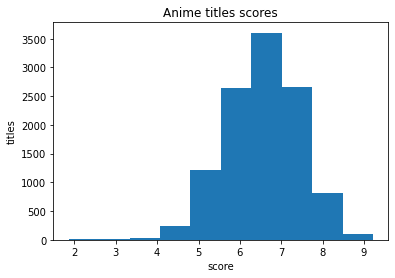

In [6]:
plt.hist(df.score)
plt.title('Anime titles scores')
plt.xlabel('score')
plt.ylabel('titles')
plt.show()

In [7]:
df.sort_values(by='popularity').head(10)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,studios,synopsis,title,type
1517,1535,2006-10-04T00:00:00+00:00,2007-06-27T00:00:00+00:00,23 min per ep,37,"['Mystery', 'Police', 'Psychological', 'Supern...",1,Fall 2006,58.0,R - 17+ (violence & profanity),8.62,1524129,Manga,"[{'mal_id': 11, 'name': 'Madhouse'}]","A shinigami, as a god of death, can kill any p...",Death Note,TV
1780,16498,2013-04-07T00:00:00+00:00,2013-09-29T00:00:00+00:00,24 min per ep,25,"['Action', 'Military', 'Mystery', 'Super Power...",2,Spring 2013,114.0,R - 17+ (violence & profanity),8.45,1459834,Manga,"[{'mal_id': 858, 'name': 'Wit Studio'}]","Centuries ago, mankind was slaughtered to near...",Shingeki no Kyojin,TV
637,11757,2012-07-08T00:00:00+00:00,2012-12-23T00:00:00+00:00,23 min per ep,25,"['Action', 'Game', 'Adventure', 'Romance', 'Fa...",3,Summer 2012,2273.0,PG-13 - Teens 13 or older,7.31,1360025,Light novel,"[{'mal_id': 56, 'name': 'A-1 Pictures'}]","In the year 2022, virtual reality has progress...",Sword Art Online,TV
9250,5114,2009-04-05T00:00:00+00:00,2010-07-04T00:00:00+00:00,24 min per ep,64,"['Action', 'Military', 'Adventure', 'Comedy', ...",4,Spring 2009,1.0,R - 17+ (violence & profanity),9.22,1189005,Manga,"[{'mal_id': 4, 'name': 'Bones'}]","""In order for something to be obtained, someth...",Fullmetal Alchemist: Brotherhood,TV
4736,30276,2015-10-05T00:00:00+00:00,2015-12-21T00:00:00+00:00,24 min per ep,12,"['Action', 'Sci-Fi', 'Comedy', 'Parody', 'Supe...",5,Fall 2015,63.0,R - 17+ (violence & profanity),8.61,1238395,Web manga,"[{'mal_id': 11, 'name': 'Madhouse'}]",The seemingly ordinary and unimpressive Saitam...,One Punch Man,TV
3070,22319,2014-07-04T00:00:00+00:00,2014-09-19T00:00:00+00:00,24 min per ep,12,"['Action', 'Mystery', 'Horror', 'Psychological...",6,Summer 2014,777.0,R - 17+ (violence & profanity),7.82,1057840,Manga,"[{'mal_id': 1, 'name': 'Studio Pierrot'}]",Tokyo has become a cruel and merciless city—a ...,Tokyo Ghoul,TV
5362,31964,2016-04-03T00:00:00+00:00,2016-06-26T00:00:00+00:00,24 min per ep,13,"['Action', 'Comedy', 'School', 'Shounen', 'Sup...",7,Spring 2016,302.0,PG-13 - Teens 13 or older,8.19,1060535,Manga,"[{'mal_id': 4, 'name': 'Bones'}]","The appearance of ""quirks,"" newly discovered s...",Boku no Hero Academia,TV
11032,9253,2011-04-06T00:00:00+00:00,2011-09-14T00:00:00+00:00,24 min per ep,24,"['Thriller', 'Sci-Fi']",8,Spring 2011,2.0,PG-13 - Teens 13 or older,9.13,858736,Visual novel,"[{'mal_id': 314, 'name': 'White Fox'}]",The self-proclaimed mad scientist Rintarou Oka...,Steins;Gate,TV
2531,20,2002-10-03T00:00:00+00:00,2007-02-08T00:00:00+00:00,23 min per ep,220,"['Action', 'Adventure', 'Comedy', 'Super Power...",9,Fall 2002,670.0,PG-13 - Teens 13 or older,7.89,1018279,Manga,"[{'mal_id': 1, 'name': 'Studio Pierrot'}]","Moments prior to Naruto Uzumaki's birth, a hug...",Naruto,TV
2495,19815,2014-04-09T00:00:00+00:00,2014-06-25T00:00:00+00:00,23 min per ep,12,"['Game', 'Adventure', 'Comedy', 'Supernatural'...",10,Spring 2014,258.0,PG-13 - Teens 13 or older,8.25,986733,Light novel,"[{'mal_id': 11, 'name': 'Madhouse'}]",No Game No Life is a surreal comedy that follo...,No Game No Life,TV


Text(0, 0.5, 'rank')

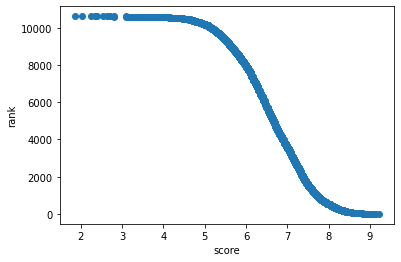

In [8]:
plt.scatter(df['score'], 
            df['rank'])
plt.xlabel('score')
plt.ylabel('rank')

In [9]:
# посмотрим среднее значение оценки аниме по источнику (экранизация/ремейк/оригинал, etc)
source_mean = df.groupby('source').score.mean()
print(source_mean)

source
4-koma manga     6.815284
Book             6.706140
Card game        6.480222
Digital manga    5.962500
Game             6.428281
Light novel      7.085617
Manga            6.966008
Music            5.902151
Novel            6.918248
Original         6.298619
Other            6.179121
Picture book     6.240000
Radio            6.018000
Unknown          6.114660
Visual novel     6.456517
Web manga        6.899018
Name: score, dtype: float64


Text(0, 0.5, 'mean score')

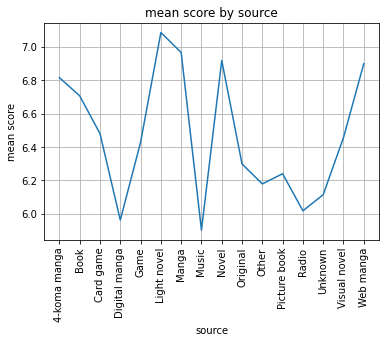

In [10]:
source_mean.plot(title='mean score by source')
plt.grid()
plt.xticks(range(0,source_mean.size), source_mean.index, rotation='vertical')
plt.xlabel('source')
plt.ylabel('mean score')


Text(0, 0.5, 'mean score')

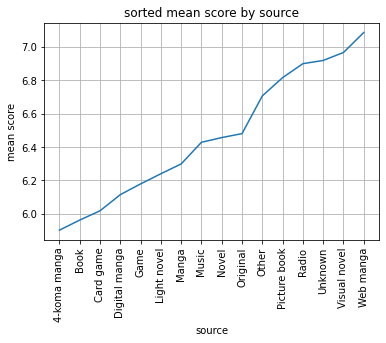

In [11]:
df.groupby('source').score.mean().sort_values().plot(title='sorted mean score by source')
plt.grid()
plt.xticks(range(0,source_mean.size), source_mean.index, rotation='vertical')
plt.xlabel('source')
plt.ylabel('mean score')

In [12]:
print(pd.to_datetime(df['aired_to']).max())
print(pd.to_datetime(df['aired_from']).min())
# получим самую позднюю дату в списке "выходит до" и самую раннюю в списке "выходит с"

2020-12-17 00:00:00+00:00
1917-04-01 00:00:00+00:00


In [13]:
# заполним этими значениями пустые ячейки в колонках aired_to и aired_from
df['aired_to'] = df['aired_to'].fillna('2020-12-17 00:00:00+00:00')
df['aired_from'] = df['aired_from'].fillna('1917-04-01 00:00:00+00:00')
date_aired = list()
# тогда в новой колонке не будет отрицательных значений
for i in range(df['aired_to'].size):
    date_aired.append(((pd.to_datetime(df['aired_to'][i]).date() - pd.to_datetime(df['aired_from'][i]).date()).days)/365)
df['aired'] = date_aired
# новая колонка отражает время, в течение которого выходило аниме

In [14]:
print(df['aired'])

0         1.057534
1         0.230137
2         0.920548
3        12.969863
4        13.726027
           ...    
11330     1.534247
11331     9.238356
11332    39.345205
11333     0.805479
11334     9.756164
Name: aired, Length: 11335, dtype: float64


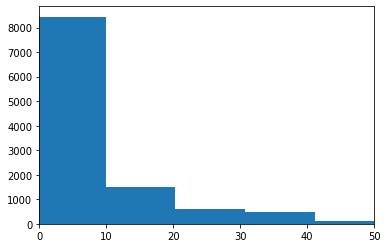

In [15]:
plt.hist(df['aired'])
plt.xlim(0, 50)
plt.show()

In [16]:
df.head()

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,studios,synopsis,title,type,aired
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,TV,1.057534
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,TV,0.230137
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,TV,0.920548
3,10003,2008-01-01T00:00:00+00:00,2020-12-17 00:00:00+00:00,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,OVA,12.969863
4,10005,2007-03-31T00:00:00+00:00,2020-12-17 00:00:00+00:00,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,Movie,13.726027


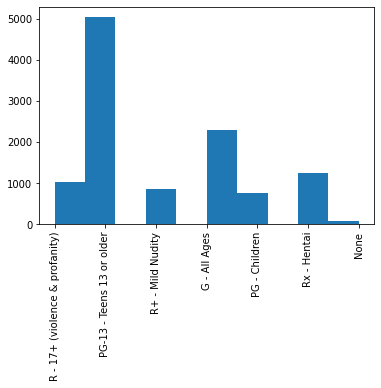

In [17]:
plt.hist(df['rating'])
plt.xticks(rotation='vertical')
plt.show()

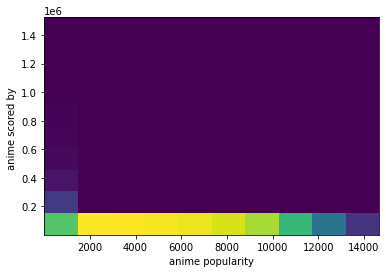

In [18]:
df.fillna(0)
plt.hist2d(df.popularity, 
           df.scored_by,
          )
plt.xlabel('anime popularity')
plt.ylabel('anime scored by ')
plt.show()

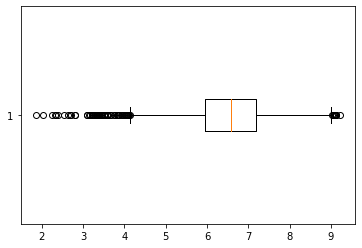

In [19]:
plt.boxplot(df.score,
            vert=False)
plt.show()